# pymrio - multi regional input output analysis in python

by Konstantin Stadler, NTNU

pymrio is an open source tool for analysing global environmental extended multi-regional input-output tables (EE MRIOs). 

Source Repository: https://github.com/konstantinstadler/pymrio

pymrio aims to provide a consistent framework for handling EE MRIOs. It include methods for 

- parsing global MRIOs
- modifying region/sector classification
- restructuring extensions
- calculating various accounts (footprint, territorial, impacts embodied in trade)
- exporting to various formats
- visualization and 
- automated report generation

Current development concentrates on methods for investigating the source of impacts, in depth analysis of the MRIO system and parsing further MRIO systems. 

## Installation

Up to now now pymrio doesn't have a installation routine. Just download the package from the source repository (download zip on right toolstrip), extract and add the folder to your python path. 

In [1]:
import sys
_pymrio_path = r'S:\pymrio-master'  
if not _pymrio_path in sys.path:
    sys.path.append(_pymrio_path)
del _pymrio_path


## Tutorial

### Exploring the initial MRIO system

pymrio comes with an small pseudo MRIO (test system). This can be used for development and testing MRIO routines and will be used in the following tutorial.

First import pymrio:

In [2]:
import pymrio as mr

Load the test mrio. For parsing and loading the original EXIOBASE 2.2 files just use pmr.parse_exiobase22.

In [3]:
mrio = mr.load_test()

We can now explore the system. First we want to check whats in the system:

In [4]:
str(mrio)

'IO System with parameters: factor_inputs, name, price, version, year, emissions, Z, Y, population, unit'

Thus, the test system consists of 

    1) a trade flow matrix Z, 
    2) finald demand Y, 
    3) two extensions:
    
        - factor_inputs
        - emissions
        
    4) and information to unit, price system, baseyear, version...
    

We can access the parameter with the standard python notations, for example

In [5]:
mrio.Z

region                        reg1                                             \
sector                        food       mining   manufactoring   electricity   
region sector                                                                   
reg1   food           23697.221000    57.495387   106490.980000    195.903190   
       mining           257.183170  2341.156500    18697.682000   6120.415900   
       manufactoring  39540.225000  6063.071000  1133749.400000  20674.380000   
       electricity     4039.179300  1852.159000    62038.378000  62177.762000   
       construction    1235.475700   844.585880    15077.254000   6711.257700   
       trade          15734.902000  1727.254800   268598.810000   7880.960000   
       transport       3272.995500  2940.896000   119092.550000   7177.094100   
       other          19258.250000  4488.062900   402431.890000  33830.992000   
reg2   food             874.878840     4.103867     2606.425100    179.919920   
       mining            77.779107    25.509309     3273.211700    602.649080   
...                            ...          ...             ...           ...   
reg5   transport         79.582514    56.246613     3486.216100    238.248970   
       other             47.972935    16.897852     2684.437100    197.878620   
reg6   food            1427.528100     6.948576     4408.745400    259.289860   
       mining           225.075690   363.483630    60659.986000  18999.843000   
       manufactoring   3205.378500   284.756270    73382.716000   2381.148500   
       electricity       13.296250     9.598524      238.054850    153.212170   
       construction       2.200030     1.850223       48.190443     13.324687   
       trade             52.927724    10.169959     1082.116500     51.908459   
       transport        105.779700   128.517840     4471.746800    252.706500   
       other             50.024168    24.598865     1239.261100    113.752330   

region                                                             \
sector                 construction          trade      transport   
region sector                                                       
reg1   food              230.136140   11194.553000     315.505250   
       mining           7595.179900     661.997420     257.657440   
       manufactoring  201544.510000  143663.740000   65917.811000   
       electricity      4389.448300   20077.943000    9312.111800   
       construction   173724.370000   10717.539000   11183.202000   
       trade           54269.483000   80768.016000   35457.335000   
       transport       13825.505000  105903.790000  207849.080000   
       other          103982.010000  275773.060000  114951.670000   
reg2   food              218.707210     340.823980      12.237848   
       mining             86.239127     120.640790      20.917582   
...                             ...            ...            ...   
reg5   transport         242.048770    1951.667300    4176.362600   
       other             324.211310    1014.807000     645.379610   
reg6   food              284.021220     544.456110      68.985878   
       mining            596.370220    2312.955600     437.859890   
       manufactoring    5100.412400    6531.291100    6121.226400   
       electricity        12.903025      29.984584      14.705736   
       construction      169.463490      17.929746      12.748649   
       trade             232.430400     492.539830     699.022450   
       transport         243.654010    2132.273400    4735.236100   
       other             239.489330     754.294850     488.043760   

region                                        reg2               \
sector                         other          food       mining   
region sector                                                     
reg1   food              6231.682600   1347.668200     0.505602   
       mining            1382.556600      8.815022    13.350824   
       manufactoring   182796.810000   2497.465100   868.237240

Show the Z matrix as a heatmap

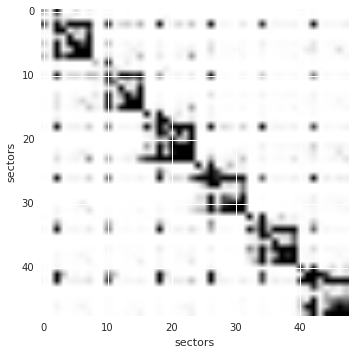

In [6]:
import seaborn # just for finer graphics
imshow(mrio.Z,vmax = 5E4)
xlabel('sectors')
ylabel('sectors')

There are also some functions availabe with provide some structural information, for example

In [7]:
print(mrio.get_regions())

['reg1' 'reg2' 'reg3' 'reg4' 'reg5' 'reg6']


Extensions are objects within the MRIO system and can be accessed as attributes. The same methods as for the core IO System are available, for example

In [8]:
str(mrio.emissions)

'Extension Emissions with parameters: F, FY, unit, name'

In [9]:
mrio.emissions.F

region                            reg1                                         \
sector                            food      mining manufactoring  electricity   
stressor       compartment                                                      
emission_type1 air          1848064.80  986448.090   23613787.00  28139100.00   
emission_type2 water         139250.47   22343.295     763569.18    273981.55   

region                                                                     \
sector                     construction      trade   transport      other   
stressor       compartment                                                  
emission_type1 air           2584141.80  4132656.3  21766987.0  7842090.6   
emission_type2 water          317396.51  1254477.8   1012999.1  2449178.0   

region                            reg2                ...         reg5  \
sector                            food      mining    ...    transport   
stressor       compartment                            ...                
emission_type1 air          1697937.30  347378.150    ...     42299319   
emission_type2 water         204835.44   29463.944    ...      4199841   

region                                        reg6                           \
sector                           other        food     mining manufactoring   
stressor       compartment                                                    
emission_type1 air          10773826.0  15777996.0  6420955.5     113172450   
emission_type2 water         7191006.3   4826108.1  1865625.1      12700193   

region                                                                     \
sector                     electricity construction     trade   transport   
stressor       compartment                                                  
emission_type1 air          56022534.0    4861838.5  18195621  47046542.0   
emission_type2 water          753213.7    2699288.3  13892313   8765784.3   

region                                
sector                         other  
stressor       compartment            
emission_type1 air          21632868  
emission_type2 water        16782553  

[2 rows x 48 columns]

In [10]:
print(mrio.emissions.get_rows())

[('emission_type1', 'air') ('emission_type2', 'water')]


### Calculating the IO System

A standard EE MRIO analysis consists of calculating the matrix of technological coefficients (A-matrix) and the Leontrief inverse (L). Subsequently, one starts to calculates the stressor / factors of productions coefficients, multipliers and finally footprints and impacts embodied in trade. pymrio aims to ease the whole process by providing one top level function for calculating all *missing* parts of the IO System. Thus:

In [11]:
mrio.calc_all()

This top level functions checks first, which parts of the IO System and of the extensions are missing. The test system contains a transaction matrix Z, based on that the function calculates the industry output x, L as well as S, M and accounts (per product, region and capita) of all extensions. 

### Exploring the fully calculated system

Lets take a look:

In [12]:
str(mrio)

'IO System with parameters: A, factor_inputs, name, price, L, version, year, emissions, Z, x, Y, population, unit'

In [13]:
str(mrio.emissions)

'Extension Emissions with parameters: F, FY, D_fp_reg, M, D_exp_reg, D_imp_cap, D_fp_cap, unit, D_imp, D_terr_cap, name, S, D_fp, D_terr, D_exp_cap, D_imp_reg, D_terr_reg, D_exp'

In [14]:
mrio.emissions.D_fp_cap

,region,reg1,reg2,reg3,reg4,reg5,reg6
stressor,compartment,,,,,,
emission_type1,air,0.266349,0.031208,0.421706,1.538139,0.905404,0.969892
emission_type2,water,0.110804,0.019461,0.457724,0.593646,0.278030,0.341361


But, of course, graphical output is much nicer

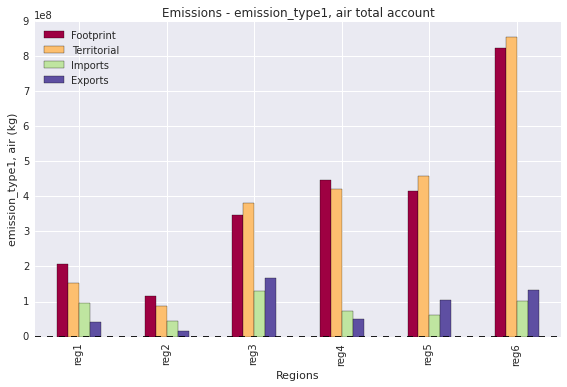

In [15]:
mrio.emissions.plot_account(['emission_type1','air'], per_capita=False)

### Aggregation

One of the standard task when handling MRIO systems is to aggregate sectors and/or countries to a differnet classification. pymrio provides some predefined aggregation levels for the test system (as well as for EXIOBASE 2).

Lets assume, that 'reg1' to 'reg3' of the test system form a region called 'EU'. We can than easily aggregate the test system by:

In [16]:
reg_vector = mr.build_agg_vec(['EU','orig_regions'], path='test')

In [17]:
mrio_eu = mrio.aggregate(region_agg=reg_vector, inplace=False)

In [18]:
mrio_EU.get_regions()

array(['EU', 'reg4', 'reg5', 'reg6'], dtype=object)

In [19]:
mrio_EU.calc_all()

In [20]:
mrio_EU.emissions.D_fp_reg

,region,EU,reg4,reg5,reg6
stressor,compartment,,,,
emission_type1,air,7.418425e+08,4.117695e+08,4.117692e+08,7.905917e+08
emission_type2,water,6.249320e+08,1.300666e+08,1.269026e+08,2.420751e+08


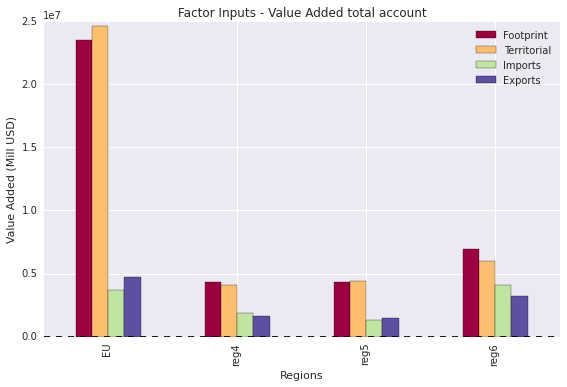

In [21]:
mrio_EU.factor_inputs.plot_account(['Value Added'])

The same principle can be used to aggregate sectors.

### Saving

Currently, the full MRIO system can be saved in txt or the python specific binary format ('pickle'). Both formats work with the same API interface:

In [22]:
mrio.save_all(r'C:\Temp\full_mrio_txt', table_format='txt')

In [23]:
mrio.save_all(r'C:\Temp\full_mrio_pkl', table_format='pickle')

Loading the whole system works accodingly

In [24]:
mrio2 = mr.load(r'C:\Temp\full_mrio_pkl', recursive = True)

It is also possible, to save and load only individual parts of the MRIO system (e.g. only one type of extensions).

Btw: loading the whole EXIOBASE 2 system from the binary format takes less than 1 sec.

### Output and report

All tables in pymrio are based on pandas DataFrames. Therefore, all pandas function can be used to export into various formats e.g:

In [25]:
mrio.emissions.M.to_excel(r'C:\Temp\multiplier.xlsx')

In [26]:
mrio.emissions.D_fp.to_html(r'C:\Temp\footprints.html')

Of course, it would be nice to have something like an automatically generated report. Lets see if we can do that:

In [27]:
mrio.report_accounts(r'C:\Temp\report', per_region=True, per_capita=True, format='html')